# High suicide rates and the Cold War

## Searching for interesting trends
While searching through some of the different data sets from [Gapminder](https://www.gapminder.org/data/), I noticed something quite interesting when looking at some of the countries with the highest suicide rates around the world. First off, I imported the data and noticed that it wasn't particularly clean:

(note, I transpose the data here so that each row represents a year)

In [62]:
import pandas as pd
%matplotlib inline
df_suicide = pd.read_csv('suicide_per_100000_people.csv', index_col=0).transpose()
df_suicide.head()

country,Albania,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Barbados,...,Trinidad and Tobago,Tunisia,Turkey,Turkmenistan,Ukraine,United Kingdom,United States,Uruguay,Uzbekistan,Venezuela
1950,NaN,NaN,NaN,NaN,9.11,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,8.12,11.20,NaN,NaN,NaN
1951,NaN,NaN,NaN,NaN,9.41,NaN,NaN,NaN,NaN,NaN,...,4.27,NaN,NaN,NaN,NaN,8.08,10.20,NaN,NaN,NaN
1952,NaN,NaN,NaN,NaN,10.50,NaN,NaN,NaN,NaN,NaN,...,5.58,NaN,NaN,NaN,NaN,7.79,9.88,NaN,NaN,NaN
1953,NaN,NaN,NaN,NaN,10.80,NaN,NaN,NaN,NaN,NaN,...,6.22,NaN,NaN,NaN,NaN,8.47,9.97,NaN,NaN,NaN
1954,NaN,NaN,NaN,NaN,10.70,NaN,NaN,NaN,NaN,NaN,...,6.13,NaN,NaN,NaN,NaN,8.93,10.00,NaN,NaN,NaN


So I'd need to dig a little deeper to find something of interest. My first thought was to rank all countries that have had the highest suicide rates **ever**, and look at the top 10

In [63]:
countries_max_ever = df_suicide.max().sort_values(ascending=False).head(10)
countries_max_ever

country
Lithuania     44.3
Suriname      42.4
Hungary       39.8
Sri Lanka     39.0
Russia        38.7
Latvia        37.9
Estonia       37.7
Kazakhstan    32.0
Belarus       31.8
Slovenia      30.5
dtype: float64

Next, to perhaps learn something of more relevance to modern life, I wanted to compare these results with the mean suicide rates of the last few years (I decided arbitrarly on data since the year 2000):

In [64]:
countries_max_recent = df_suicide.loc['2000':'2016'].mean().sort_values(ascending=False).head(10)
countries_max_recent

country
Lithuania      31.288235
Belarus        30.350000
Kazakhstan     24.785714
Ukraine        22.460000
South Korea    21.093750
Latvia         19.725000
Hungary        18.805882
Slovenia       17.925000
Japan          17.806250
Estonia        17.000000
dtype: float64

Both of these lists have one interesting commonality that immediately jumped out at me: many of the countries were once part of the East Bloc under the control of the USSR or post-Soviet countries. Could there be something going on here that might teach us more about suicide rates? I decided now to graph them to dig deeper. I looked up [post-Soviet states](https://en.wikipedia.org/wiki/Post-Soviet_states) and [Eastern Bloc states](https://en.wikipedia.org/wiki/Eastern_Bloc#List_of_states) to round out the list:

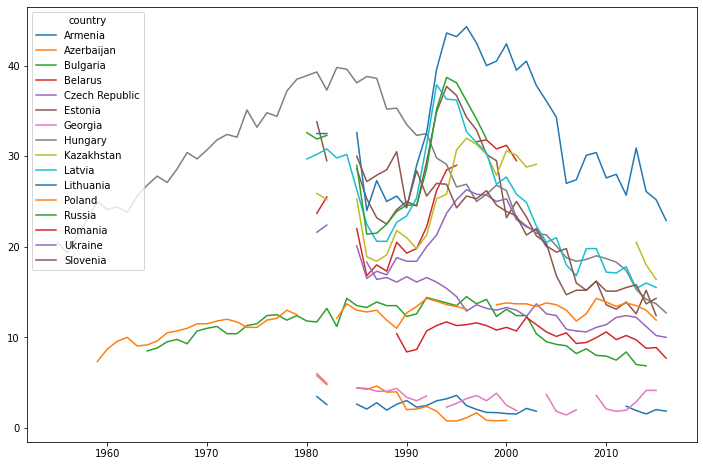

In [84]:
post_soviet_countries = [
    'Armenia',
    'Azerbaijan',
    'Bulgaria',
    'Belarus', 
    'Czech Republic',
    'Estonia',
    'Georgia',
    'Hungary', 
    'Kazakhstan',
    'Latvia', 
    'Lithuania', 
    'Poland',
    'Russia',
    'Romania',
    'Ukraine',
    'Slovenia']
df_suicide[post_soviet_countries].plot(figsize=(12, 8));
#TODO tidy up graph

Indeed, comparing them to a handful [of typically "Western" nations](https://www.gapminder.org/data/geo/west-vs-rest/) (for whom data is available) suggests a few interesting differences, particularly in the quality and spread of the data collected since 1950:

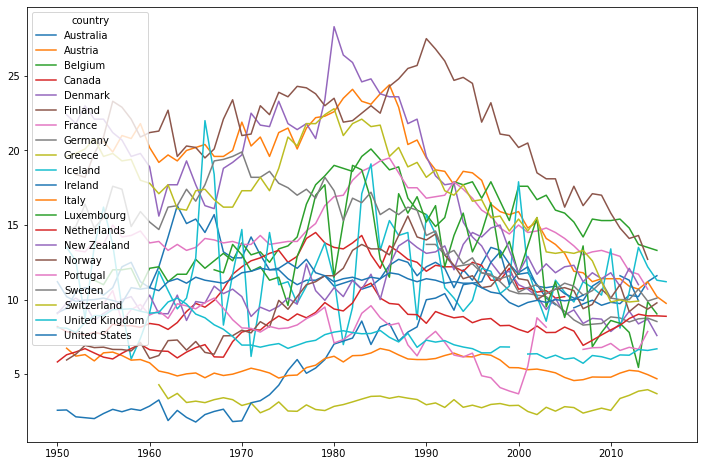

In [74]:
western_countries = [
    'Australia', 
    'Austria', 
    'Belgium', 
    'Canada', 
    'Denmark', 
    'Finland', 
    'France', 
    'Germany', 
    'Greece', 
    'Iceland', 
    'Ireland', 
    'Italy', 
    'Luxembourg', 
    'Netherlands', 
    'New Zealand', 
    'Norway', 
    'Portugal', 
    'Sweden', 
    'Switzerland', 
    'United Kingdom',
    'United States'
]

df_suicide[western_countries].plot(figsize=(12, 8));


This narrows our focus a little bit to countries on mainland Europe, North America, and Australia and New Zealand. I also want to include the 3 other nations that appear to have particularly high suicide rates: Japan, Suriname

<AxesSubplot:>

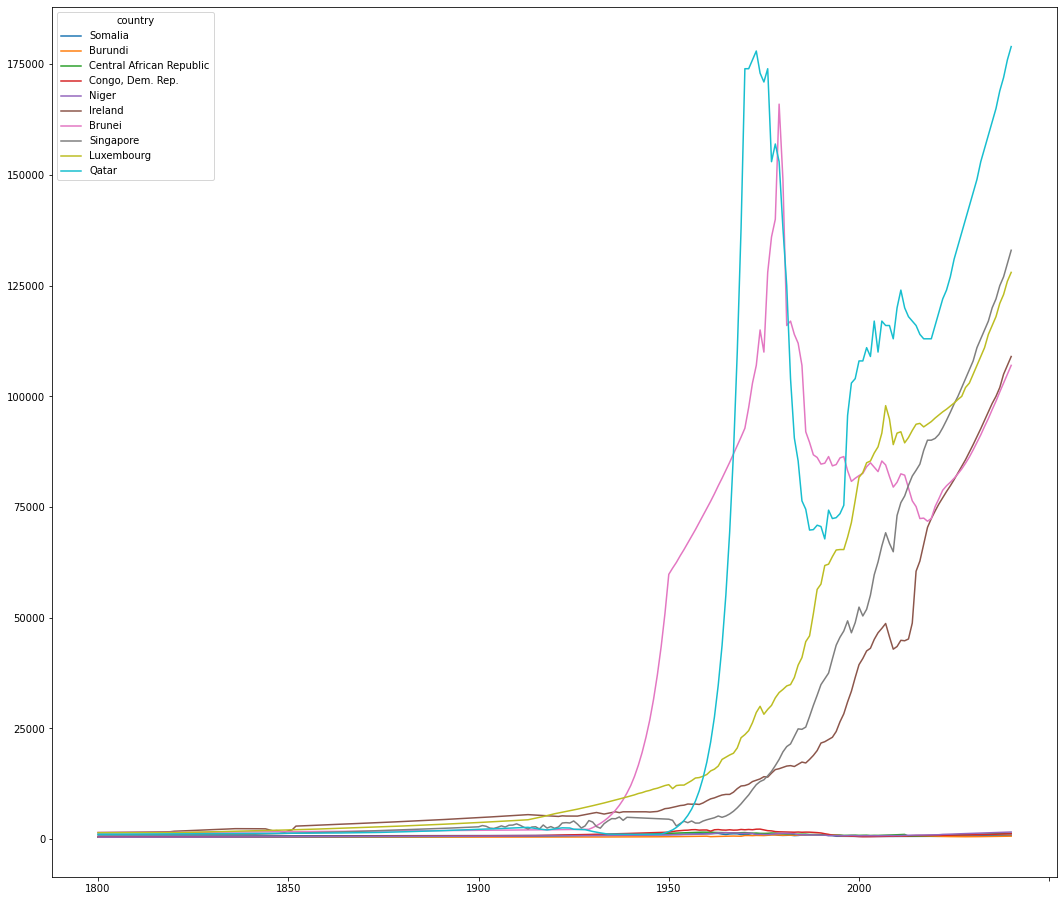

In [58]:
# Get the data of the poorest and richest 5 countries as of 2018 (the last year of data)
df = pd.read_csv('income_per_person_gdppercapita_ppp_inflation_adjusted.csv', index_col=0).transpose()
df.head()

eu_countries = ['Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus', 'Czechia', 'Denmark',
   'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Ireland',
   'Italy', 'Latvia', 'Lithuania', 'Luxembourg', 'Malta', 'Netherlands',
   'Poland', 'Portugal', 'Romania', 'Slovakia', 'Slovenia', 'Spain', 'Sweden']

inc_2018 = df.loc['2018'].sort_values()
inc_countries = inc_2018.head(5).append(inc_2018.tail(5)).keys().array

df.plot(y=inc_countries, figsize=(18, 16))

## Life expectancy

In [8]:
df = pd.read_csv('life_expectancy_years.csv', index_col=0).transpose()
df.head()

country,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Kingdom,United States,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe
1800,28.2,35.4,28.8,NaN,27.0,33.5,33.2,34.0,34.0,34.4,...,38.6,39.4,32.9,26.9,24.3,32.2,32.0,23.4,32.6,33.7
1801,28.2,35.4,28.8,NaN,27.0,33.5,33.2,34.0,34.0,34.4,...,37.4,39.4,32.9,26.9,24.3,32.2,32.0,23.4,32.6,33.7
1802,28.2,35.4,28.8,NaN,27.0,33.5,33.2,34.0,34.0,34.4,...,38.6,39.4,32.9,26.9,24.3,32.2,32.0,23.4,32.6,33.7
1803,28.2,35.4,28.8,NaN,27.0,33.5,33.2,34.0,34.0,34.4,...,37.3,39.4,32.9,26.9,24.3,32.2,32.0,23.4,32.6,33.7
1804,28.2,35.4,28.8,NaN,27.0,33.5,33.2,34.0,34.0,34.4,...,41.4,39.4,32.9,26.9,24.3,32.2,32.0,23.4,32.6,33.7


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 301 entries, 1800 to 2100
Columns: 187 entries, Afghanistan to Zimbabwe
dtypes: float64(187)
memory usage: 442.1+ KB


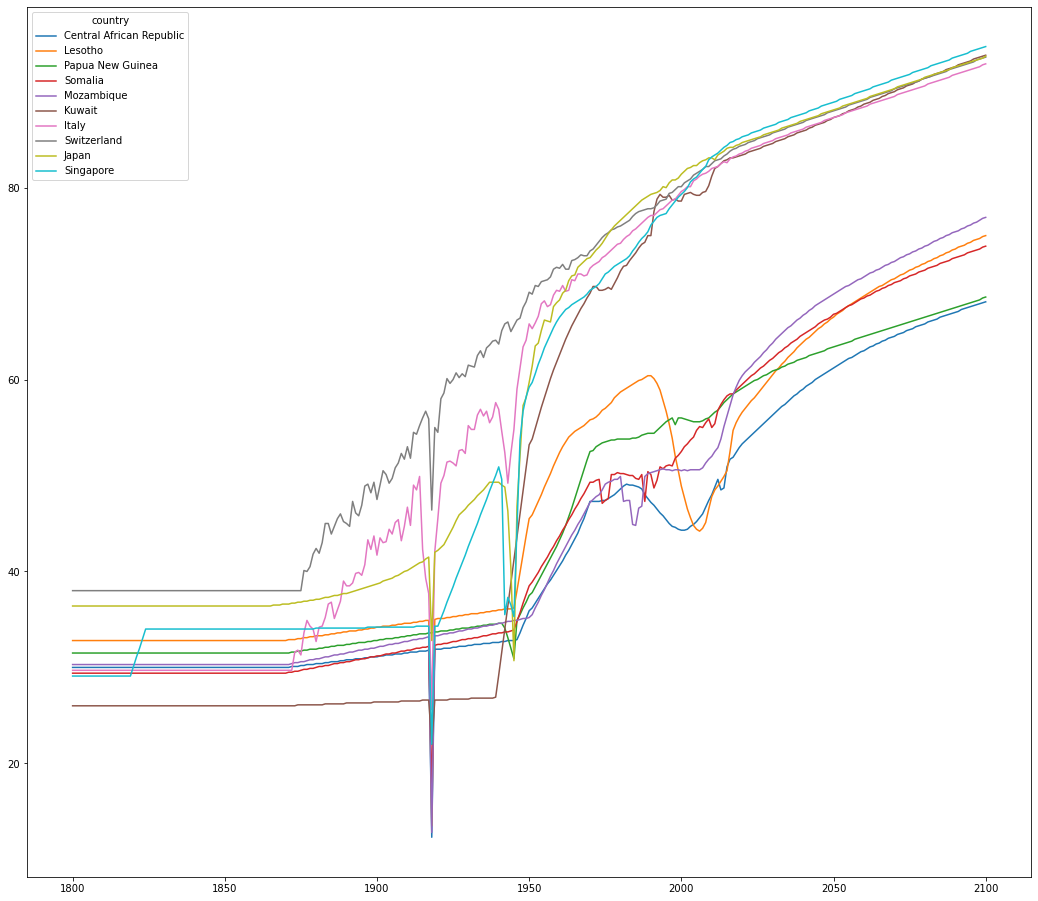

In [10]:
inc_2018 = df.loc['2018'].sort_values().dropna()
inc_2018.tail()
inc_countries = inc_2018.head(5).append(inc_2018.tail(5)).keys().array
df.plot(y=inc_countries, figsize=(18, 16));

## Traffic deaths

In [11]:
df = pd.read_csv('traffic_deaths_per_100000_people.csv', index_col=0).transpose()
df.head()

country,Albania,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Barbados,...,Trinidad and Tobago,Tunisia,Turkey,Turkmenistan,Ukraine,United Kingdom,United States,Uruguay,Uzbekistan,Venezuela
1950,NaN,NaN,NaN,NaN,22.3,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,9.47,23.3,NaN,NaN,NaN
1951,NaN,NaN,NaN,NaN,25.6,NaN,NaN,NaN,NaN,NaN,...,0.90,NaN,NaN,NaN,NaN,10.20,24.6,NaN,NaN,NaN
1952,NaN,NaN,NaN,NaN,24.8,NaN,NaN,NaN,NaN,NaN,...,2.02,NaN,NaN,NaN,NaN,9.17,24.9,NaN,NaN,NaN
1953,NaN,NaN,NaN,NaN,23.0,NaN,NaN,NaN,NaN,NaN,...,15.80,NaN,NaN,NaN,NaN,9.82,24.8,NaN,NaN,NaN
1954,NaN,NaN,NaN,NaN,24.3,NaN,NaN,NaN,NaN,NaN,...,14.50,NaN,NaN,NaN,NaN,10.10,23.0,NaN,NaN,NaN


In [12]:
vcs = df.count(0)

# Select countries where the number of years of data exceeds 50
countries = vcs[vcs.sort_values() > 55].keys().array

df = df[countries]

df.shape

(67, 20)

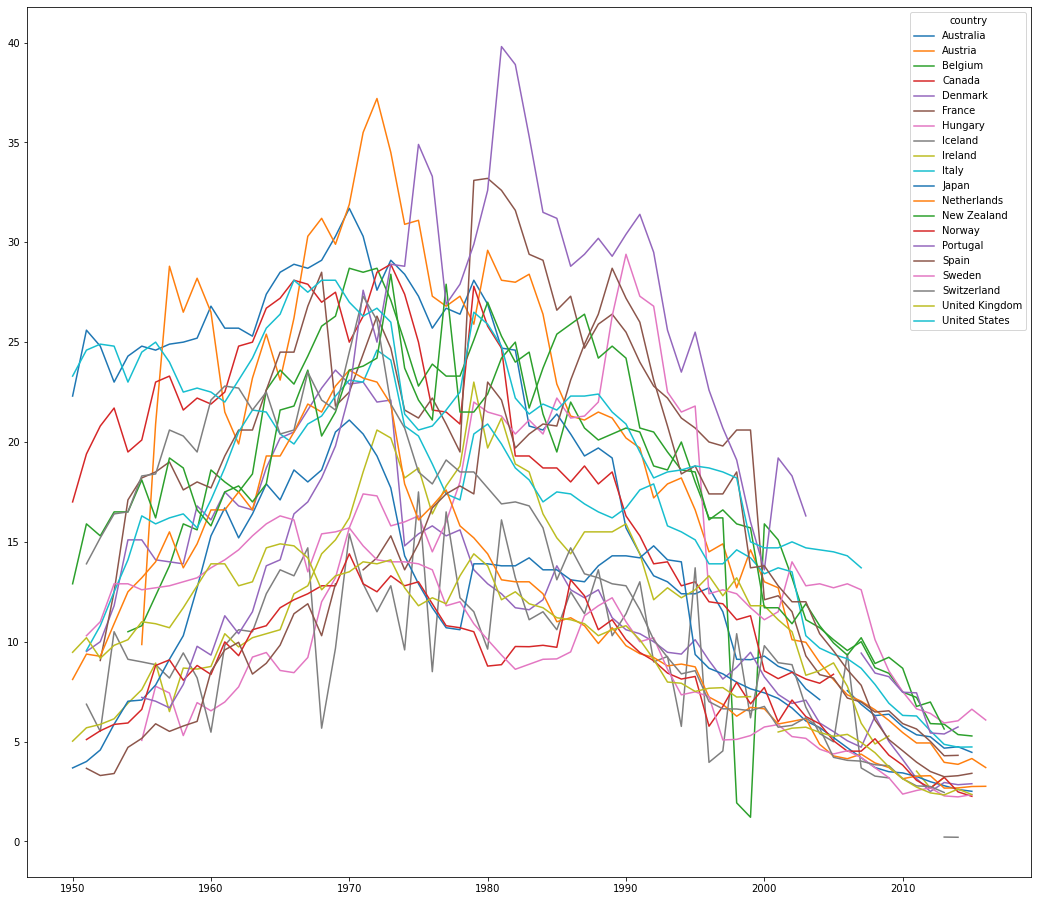

In [13]:
df.plot(figsize=(18, 16));